### 1. Instalación de Dependencias

In [ ]:
!pip install trimesh vedo numpy matplotlib

### 2. Importar Librerías

In [2]:
import trimesh
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import vedo
from IPython.display import Image, display
import os

### 3. Función para cargar modelo

In [3]:
def cargar_modelo_3d(ruta_archivo):
    try:
        mesh = trimesh.load(ruta_archivo)
        print(f"Modelo cargado: {ruta_archivo}")
        return mesh
    except Exception as e:
        print(f"Error al cargar el modelo: {e}")
        return None

### 4. Función para mostrar información estructural

In [4]:
def mostrar_informacion_modelo(mesh):
    print("INFORMACIÓN ESTRUCTURAL DEL MODELO 3D")

    print(f"   • Número de vértices: {len(mesh.vertices):,}")
    print(f"   • Número de caras: {len(mesh.faces):,}")
    print(f"   • Número de aristas: {len(mesh.edges):,}")

### 5. Visualización de vértices, aristas y caras

In [6]:
def visualizar_con_matplotlib(mesh, mostrar_vertices=True, mostrar_aristas=True, mostrar_caras=True):
    fig = plt.figure(figsize=(15, 5))

    # caras
    ax1 = fig.add_subplot(131, projection='3d')
    if mostrar_caras:
        poly3d = Poly3DCollection(mesh.vertices[mesh.faces],
                                  alpha=0.7,
                                  facecolor='blue',
                                  edgecolor='none')
        ax1.add_collection3d(poly3d)
    ax1.set_title('Caras (Cyan)', fontsize=12, fontweight='bold')
    configurar_ejes(ax1, mesh)

    # aristas
    ax2 = fig.add_subplot(132, projection='3d')
    if mostrar_aristas:
        for edge in mesh.edges:
            puntos = mesh.vertices[edge]
            ax2.plot3D(*puntos.T, 'r-', linewidth=0.5, alpha=0.6)
    ax2.set_title('Aristas (Rojo)', fontsize=12, fontweight='bold')
    configurar_ejes(ax2, mesh)

    # vertices
    ax3 = fig.add_subplot(133, projection='3d')
    if mostrar_vertices:
        ax3.scatter(mesh.vertices[:, 0],
                   mesh.vertices[:, 1],
                   mesh.vertices[:, 2],
                   c='green',
                   marker='o',
                   s=1,
                   alpha=0.8)
    ax3.set_title('Vértices (Verde)', fontsize=12, fontweight='bold')
    configurar_ejes(ax3, mesh)

    plt.tight_layout()
    plt.show()

def configurar_ejes(ax, mesh):
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    bounds = mesh.bounds
    ax.set_xlim(bounds[0][0], bounds[1][0])
    ax.set_ylim(bounds[0][1], bounds[1][1])
    ax.set_zlim(bounds[0][2], bounds[1][2])

    ax.set_box_aspect([1,1,1])

### 6. Visualización combinada

In [7]:
def visualizar_combinado(mesh):
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')

    # caras
    poly3d = Poly3DCollection(mesh.vertices[mesh.faces],
                              alpha=0.3,
                              facecolor='blue',
                              edgecolor='none')
    ax.add_collection3d(poly3d)

    # aristas
    num_aristas = len(mesh.edges)
    step = max(1, num_aristas // 500)
    for i, edge in enumerate(mesh.edges[::step]):
        puntos = mesh.vertices[edge]
        ax.plot3D(*puntos.T, 'r-', linewidth=0.5, alpha=0.4)

    # vértices
    num_vertices = len(mesh.vertices)
    step_v = max(1, num_vertices // 1000)
    vertices_muestra = mesh.vertices[::step_v]
    ax.scatter(vertices_muestra[:, 0],
               vertices_muestra[:, 1],
               vertices_muestra[:, 2],
               c='green',
               marker='o',
               s=5,
               alpha=0.6)

    ax.set_title('(Verde: Vértices | Rojo: Aristas | Cyan: Caras)',
                 fontsize=14, fontweight='bold')
    configurar_ejes(ax, mesh)

    plt.tight_layout()
    plt.show()

### 7. Cargar modelo

In [13]:
ruta_modelo = '../media/heart.obj'
mesh_ejemplo = cargar_modelo_3d(ruta_modelo)

Modelo cargado: ../media/heart.obj


### 8. Mostrar Información del Modelo

In [15]:
mostrar_informacion_modelo(mesh_ejemplo)

INFORMACIÓN ESTRUCTURAL DEL MODELO 3D
   • Número de vértices: 5,974
   • Número de caras: 11,264
   • Número de aristas: 33,792


### 9. Visualización de caras, aristas y vertices

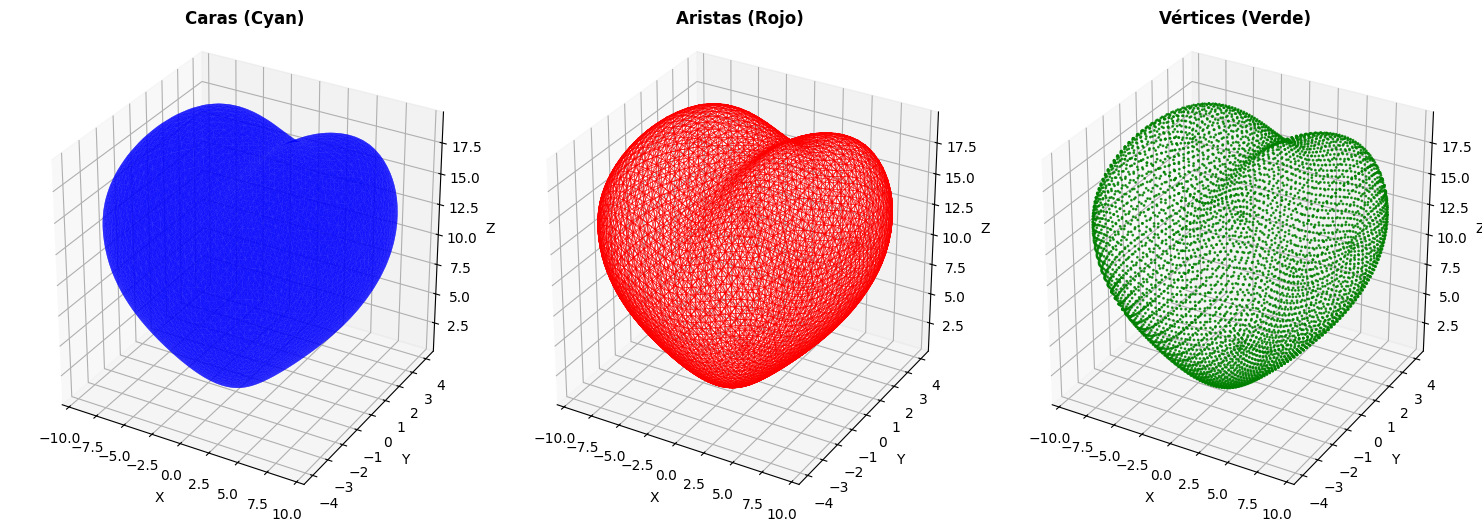

In [16]:
visualizar_con_matplotlib(mesh_ejemplo)

### 10. Visualización Combinada

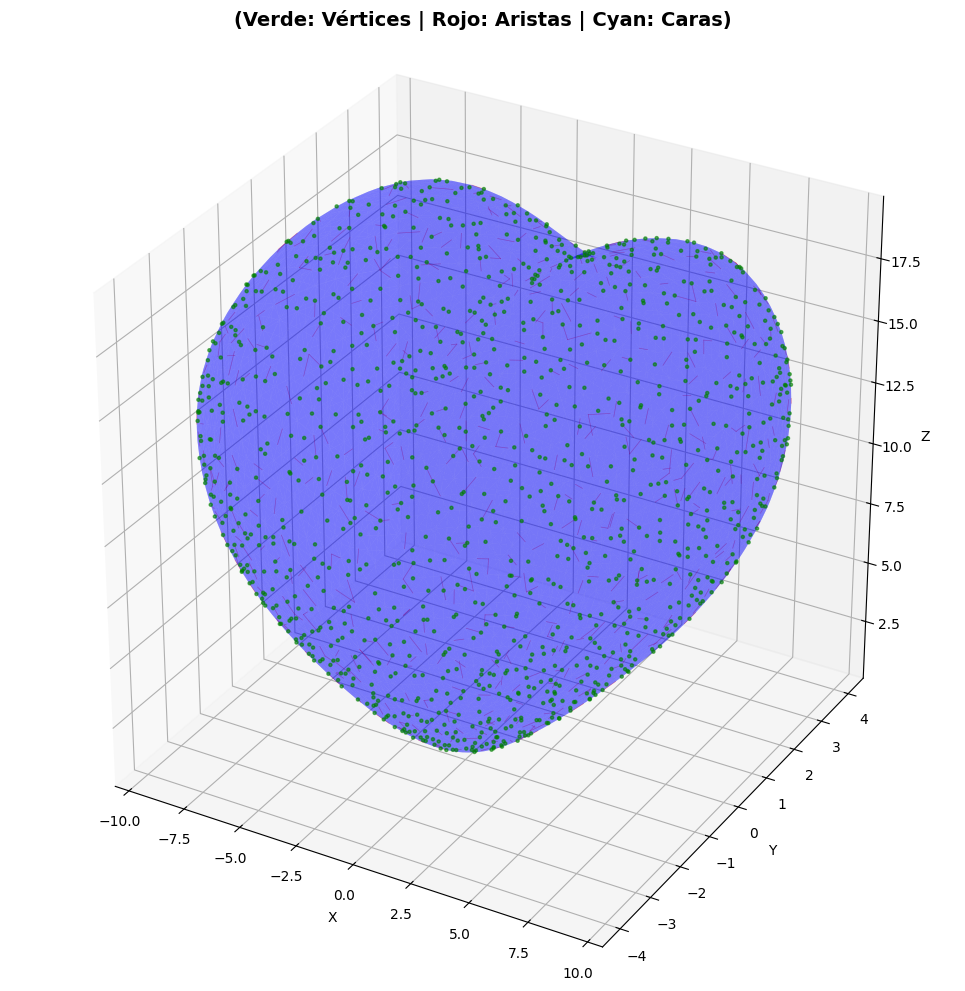

In [17]:
visualizar_combinado(mesh_ejemplo)